<a href="https://colab.research.google.com/github/hillelMerran/data-science/blob/main/Feature_Engineering_on_Ames_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers processing
This work is based on a dataset found in Kaggle describing house sales.

[https://www.kaggle.com/datasets/prevek18/ames-housing-dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DataSet Ames

Import and visualize the data.

In [2]:
url = "https://raw.githubusercontent.com/hillelMerran/data-science/main/AmesHousing.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Quick research of potential correlations from features to final sale price

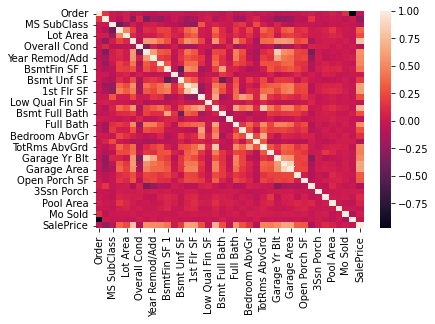

In [4]:
sns.heatmap(df.corr());

In [5]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

## Looking for outliers

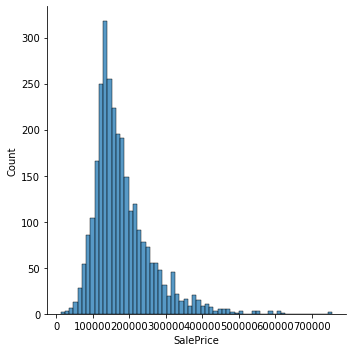

In [6]:
sns.displot(df["SalePrice"]);

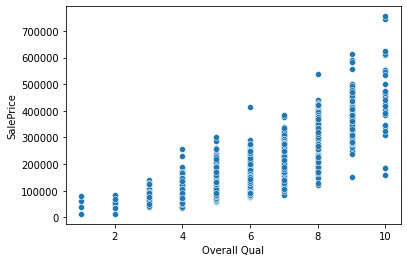

In [7]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [8]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


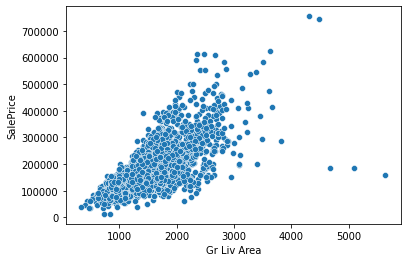

In [9]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

In [10]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [11]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

## Delete outliers

In [12]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [13]:
df = df.drop(ind_drop,axis=0)

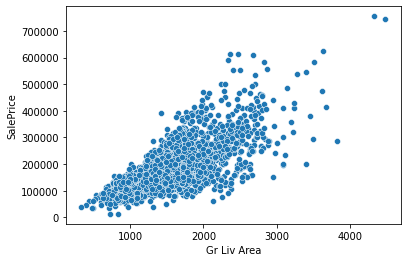

In [14]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

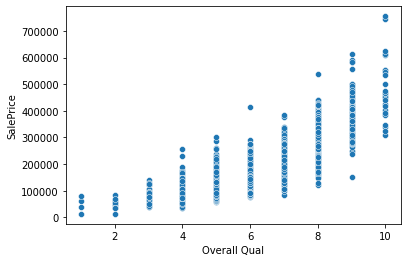

In [15]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [16]:
df.to_csv("Ames_outliers_removed.csv",index=False)

# Null features processing

## Search of NULL values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS SubClass      2927 non-null   int64  
 3   MS Zoning        2927 non-null   object 
 4   Lot Frontage     2437 non-null   float64
 5   Lot Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2927 non-null   object 
 9   Land Contour     2927 non-null   object 
 10  Utilities        2927 non-null   object 
 11  Lot Config       2927 non-null   object 
 12  Land Slope       2927 non-null   object 
 13  Neighborhood     2927 non-null   object 
 14  Condition 1      2927 non-null   object 
 15  Condition 2      2927 non-null   object 
 16  Bldg Type        2927 non-null   object 
 17  House Style   

In [18]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [19]:
df = df.drop(['Order','PID'], axis=1)

In [20]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [21]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [22]:
df.isnull().sum()*100/len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [23]:
def percent_missing(df):
  perc = df.isnull().sum()*100/len(df)
  perc = perc[perc>0].sort_values()
  return perc

In [24]:
nan_percent = percent_missing(df)

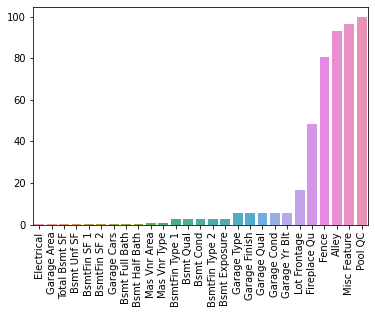

In [25]:
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

## Deleting/filling null values

### Low missing percentage

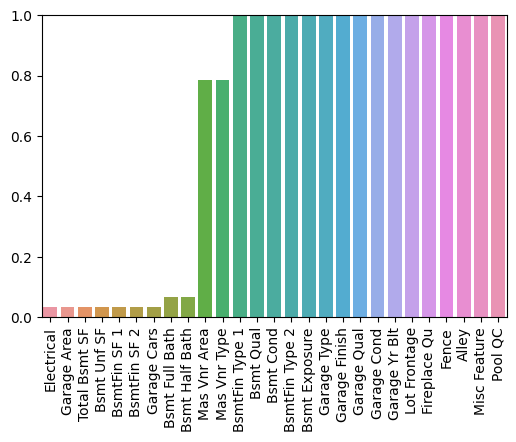

In [26]:
plt.figure(dpi=100)
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

# fixing threshold to 1%
plt.ylim(0,1);

In [27]:
nan_percent[nan_percent<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

Number of rows with null values:

In [28]:
0.034165/100*len(df)

1.00000955

Inspect those rows.



In [29]:
df[(df[nan_percent[nan_percent<1].index].isnull().any(axis=1))][nan_percent[nan_percent<1].index]

,Electrical,Garage Area,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Garage Cars,Bsmt Full Bath,Bsmt Half Bath,Mas Vnr Area,Mas Vnr Type
55,SBrkr,440.0,860.0,235.0,625.0,0.0,2.0,1.0,0.0,NaN,NaN
484,SBrkr,644.0,870.0,219.0,651.0,0.0,3.0,1.0,0.0,NaN,NaN
517,SBrkr,529.0,1436.0,1436.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN
538,SBrkr,555.0,1176.0,343.0,833.0,0.0,2.0,1.0,0.0,NaN,NaN
867,SBrkr,550.0,840.0,840.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN
1095,SBrkr,403.0,707.0,707.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN
1119,SBrkr,480.0,1460.0,794.0,666.0,0.0,2.0,0.0,0.0,NaN,NaN
1122,SBrkr,480.0,1428.0,1428.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN
1127,SBrkr,562.0,813.0,813.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN
1184,SBrkr,469.0,952.0,952.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN


In [30]:
Bsmt_indexes = nan_percent[nan_percent<1].index[[2,3,4,5,7,8]]

In [31]:
df[(df[Bsmt_indexes].isnull().any(axis=1))][nan_percent[nan_percent<1].index]

,Electrical,Garage Area,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Garage Cars,Bsmt Full Bath,Bsmt Half Bath,Mas Vnr Area,Mas Vnr Type
1341,FuseA,280.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,None
1497,SBrkr,624.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,None


Many values are missing in the same row (index 1341) related to Basement.

We can delete it or we can see if there is a reasonable value we can fill it with.

Let's read the features description file.

In [32]:
import requests

url = 'https://raw.githubusercontent.com/hillelMerran/data-science/main/Ames_Housing_Feature_Description.txt'
r = requests.get(url)
with open('description.txt', 'wb') as f:
    f.write(r.content)
with open('description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Those features are numerical (foot squared).

We'll suppose null values mean no basement, so let's fill numerical features with 0.

In [33]:
df[Bsmt_indexes] = df[Bsmt_indexes].fillna(0)

We could do the same thing with the other features with low percentage of null values but let's delete them for the example.

In [34]:
df[df['Garage Area'].isnull()][nan_percent[nan_percent<1].index]

,Electrical,Garage Area,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Garage Cars,Bsmt Full Bath,Bsmt Half Bath,Mas Vnr Area,Mas Vnr Type
2236,SBrkr,NaN,859.0,311.0,548.0,0.0,NaN,0.0,0.0,0.0,None


In [35]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Area', 'Garage Cars'])

In [36]:
nan_percent = percent_missing(df)

In [37]:
nan_percent

Mas Vnr Type       0.786325
Mas Vnr Area       0.786325
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
BsmtFin Type 2     2.769231
Bsmt Exposure      2.837607
Garage Type        5.367521
Garage Cond        5.401709
Garage Qual        5.401709
Garage Finish      5.401709
Garage Yr Blt      5.401709
Lot Frontage      16.752137
Fireplace Qu      48.547009
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
dtype: float64

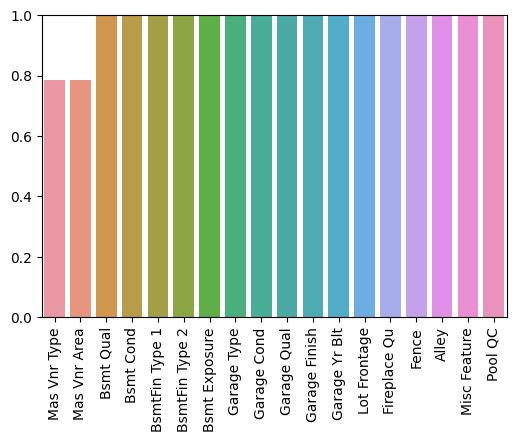

In [38]:
nan_percent = percent_missing(df)
plt.figure(dpi=100)
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1);

Suppose 'Mas Vnr' (Masonery veneer) null values mean no masonery and let fill values according to the description file.

In [39]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

### Larger percentages of missing values

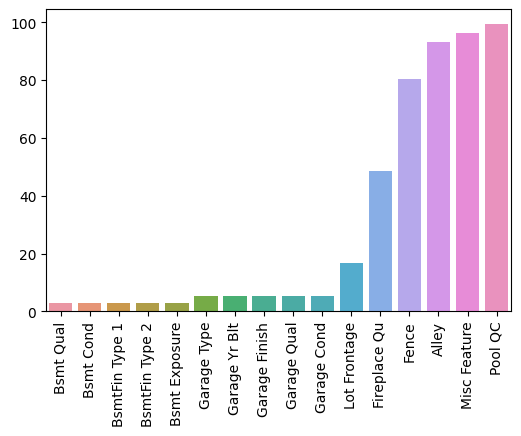

In [40]:
nan_percent = percent_missing(df)
plt.figure(dpi=100)
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

In [41]:
#df[df['Bsmt Qual'].isnull()]

In [42]:
#df[df['Bsmt Qual'].isnull() & df['Bsmt Cond'].isnull()]

In [43]:
#df[df['Bsmt Qual'].isnull() & df['Total Bsmt SF']>0][Bsmt_indexes]

We can see that all the null values in Basement Quality and Condition have Basement surface of 0, meaning no basement.

So let fill the missing values with 'NA', like it supposed to be according to the description file.

In [44]:
Bsmt_features = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

In [45]:
df[df[Bsmt_features].isnull().any(axis=1)][Bsmt_features]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2
66,Gd,TA,NaN,Unf,Unf
83,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2744,NaN,NaN,NaN,NaN,NaN
2779,Gd,TA,NaN,Unf,Unf
2879,NaN,NaN,NaN,NaN,NaN
2892,NaN,NaN,NaN,NaN,NaN


In [46]:
df[df[Bsmt_features].isnull().any(axis=1) & df['Total Bsmt SF']>0][Bsmt_indexes]

,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Bsmt Full Bath,Bsmt Half Bath
66,1595.0,1595.0,0.0,0.0,0.0,0.0
444,3206.0,1603.0,1124.0,479.0,1.0,0.0
1796,725.0,725.0,0.0,0.0,0.0,0.0
2779,936.0,936.0,0.0,0.0,0.0,0.0


In [47]:
df[Bsmt_features].loc[[66,444,1796,2779]]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2
66,Gd,TA,NaN,Unf,Unf
444,Gd,TA,No,GLQ,NaN
1796,Gd,TA,NaN,Unf,Unf
2779,Gd,TA,NaN,Unf,Unf


In [48]:
df[(df['BsmtFin Type 1'] == 'Unf') | (df['BsmtFin Type 2'] == 'Unf')][Bsmt_features]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2
0,TA,Gd,Gd,BLQ,Unf
2,TA,TA,No,ALQ,Unf
3,TA,TA,No,ALQ,Unf
4,Gd,TA,No,GLQ,Unf
5,TA,TA,No,GLQ,Unf
...,...,...,...,...,...
2923,TA,TA,No,ALQ,Unf
2924,TA,TA,No,ALQ,Unf
2925,TA,TA,Av,GLQ,Unf
2927,Gd,TA,Av,GLQ,Unf


For those 4 specific rows, there is a basement but it's unfinished.

As we see in other rows with unfinished basement, we can't predict the value of features like Basement Exposure so we'll delete the rows 66, 1796, 2779.

We'll fill the 'BsmtFin Type 2' value of row 444 with 'Unf' as it most likely the right value.

In [49]:
df = df.drop(index=[66,1796,2779])

In [50]:
df.loc[444,'BsmtFin Type 2'] = 'Unf'

All others rows have no Basement since bsement total surface is 0, so we'll fill the null values with 'NA', as it should be.

In [51]:
df[Bsmt_features] = df[Bsmt_features].fillna('NA')

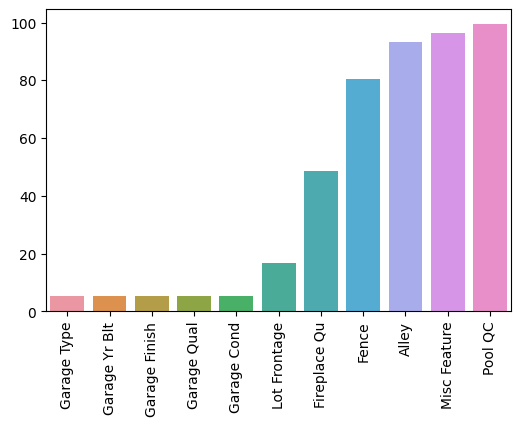

In [52]:
nan_percent = percent_missing(df)
plt.figure(dpi=100)
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

In [53]:
Garage_features = ['Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']
df[df[Garage_features].isnull().any(axis=1)][Garage_features]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
27,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2913,NaN,NaN,NaN,NaN,NaN
2916,NaN,NaN,NaN,NaN,NaN
2918,NaN,NaN,NaN,NaN,NaN
2919,NaN,NaN,NaN,NaN,NaN


In [54]:
df[df[Garage_features].isnull().any(axis=1) & df['Garage Cars']>0][Garage_features]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
1356,Detchd,NaN,NaN,NaN,NaN


As we did previously, we'll delete the 1356 row as it is not rational and we can't predict the year the garage was built and its quality.

We'll fill all the others rows with 'NA' as there is no garage.

In [55]:
df = df.drop(index=1356)

In [56]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean())

In [57]:
df[Garage_features] = df[Garage_features].fillna('NA')

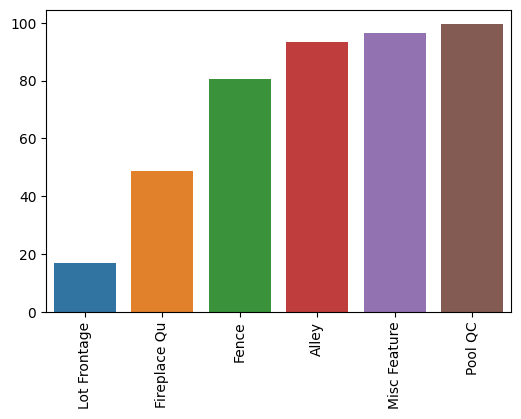

In [58]:
nan_percent = percent_missing(df)
plt.figure(dpi=100)
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

In [59]:
len(df[df['Pool QC'].isnull() & df['Pool Area']>0])

0

In [60]:
df['Pool QC'] = df['Pool QC'].fillna('NA')

In [61]:
len(df[df['Misc Feature'].isnull() & df['Misc Val']>0])

0

In [62]:
df['Misc Feature'] = df['Misc Feature'].fillna('NA')

In [63]:
len(df[df['Fireplace Qu'].isnull() & df['Fireplaces']>0])

0

In [64]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('NA')

According to the description file, Alley and Fence feature should be NA where there is no alley/fence and we could assume that for the null values.

Since the missing percentage is high, we'll simply delete the entire features for the example as it won't be much significative in the final regression coefficients.

In [65]:
df = df.drop(columns=['Alley','Fence'])

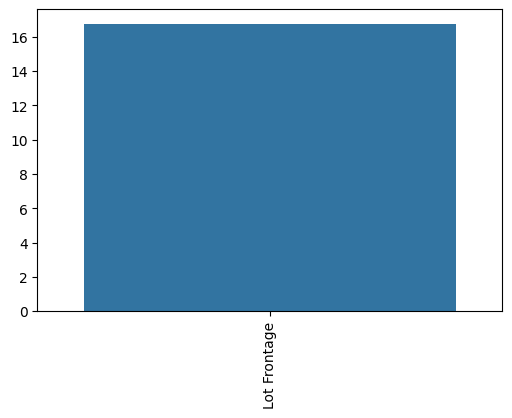

In [66]:
nan_percent = percent_missing(df)
plt.figure(dpi=100)
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

For 'Lot Frontage' feauture, we'll try to fill the null values since it represents a not negligible amount of rows.

On the other hand, it's not a categorical feature so we'll need to think about a value that is probalbly enough and also won't add bias to the model.

Lot frontage probably highly correlated to the 'Neighborhood'. Let's see if we can exploit that.

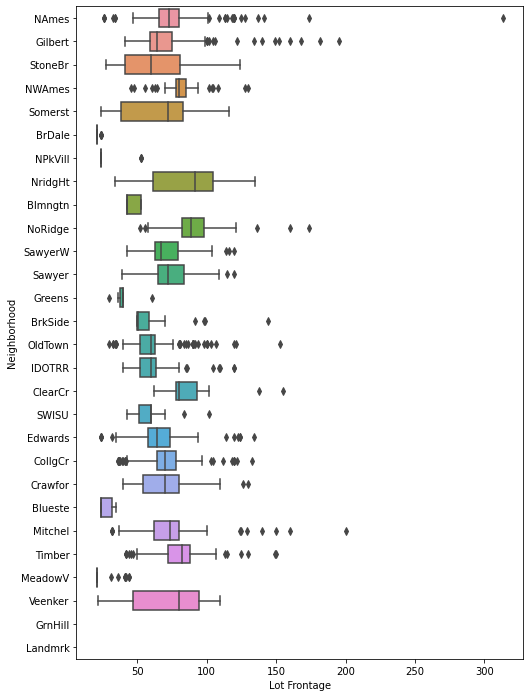

In [67]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood', orient='h');

We'll take the average length of the streets in accordance to the neighborhood.

In [68]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.365297
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.798246
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.393750
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [69]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In addition we'll delete the 3 rows of GrnHill and Landmrk missing values.

In [70]:
df[df['Neighborhood'].isin(['GrnHill','Landmrk'])][['Lot Frontage','Neighborhood']]

,Lot Frontage,Neighborhood
2256,NaN,GrnHill
2788,NaN,Landmrk
2892,NaN,GrnHill


In [71]:
df = df.drop(index=[2256,2788,2892])

In [72]:
nan_percent = percent_missing(df)
len(nan_percent)

0

In [73]:
df.to_csv("Ames_No_Missing_Data.csv")

# Categorial features processing

In [74]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Screen Porch,Pool Area,Pool QC,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NA,NA,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,120,0,NA,NA,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NA,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,NA,NA,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NA,NA,0,3,2010,WD,Normal,189900


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2918 non-null   int64  
 1   MS Zoning        2918 non-null   object 
 2   Lot Frontage     2918 non-null   float64
 3   Lot Area         2918 non-null   int64  
 4   Street           2918 non-null   object 
 5   Lot Shape        2918 non-null   object 
 6   Land Contour     2918 non-null   object 
 7   Utilities        2918 non-null   object 
 8   Lot Config       2918 non-null   object 
 9   Land Slope       2918 non-null   object 
 10  Neighborhood     2918 non-null   object 
 11  Condition 1      2918 non-null   object 
 12  Condition 2      2918 non-null   object 
 13  Bldg Type        2918 non-null   object 
 14  House Style      2918 non-null   object 
 15  Overall Qual     2918 non-null   int64  
 16  Overall Cond     2918 non-null   int64  
 17  Year Built    

Pay attention that 'MS SubClass' is a numeric feature but is in fact categorial.

Let's fix this by modify its values by strings.

There are other features like this ('Overall Qual' for example), but unlike 'MS SubClass', it makes sens to rate them.

In [76]:
df['MS SubClass'] = df['MS SubClass'].apply(lambda val: str(val))

In [77]:
df_obj = df.select_dtypes(include='object')

In [78]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2929
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2918 non-null   object
 1   MS Zoning       2918 non-null   object
 2   Street          2918 non-null   object
 3   Lot Shape       2918 non-null   object
 4   Land Contour    2918 non-null   object
 5   Utilities       2918 non-null   object
 6   Lot Config      2918 non-null   object
 7   Land Slope      2918 non-null   object
 8   Neighborhood    2918 non-null   object
 9   Condition 1     2918 non-null   object
 10  Condition 2     2918 non-null   object
 11  Bldg Type       2918 non-null   object
 12  House Style     2918 non-null   object
 13  Roof Style      2918 non-null   object
 14  Roof Matl       2918 non-null   object
 15  Exterior 1st    2918 non-null   object
 16  Exterior 2nd    2918 non-null   object
 17  Mas Vnr Type    2918 non-null   object
 18  Exter Qu

In [79]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [80]:
df_num = df.select_dtypes(exclude='object')

In [81]:
df = pd.concat([df_num, df_obj], axis=1)

In [83]:
df.to_csv('Ames_Final_Df.csv', index=False)